
## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 7: Graphs and Networks
## Due 20 November, 2019 at 6:00 PM
### <span style="color: red">Kevin Egedy</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Make sure you get download, read, and run the notebook for lecture 7. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory overview of the incredibly rich and expansive subject of Graph Theory.
- Most of the section on basic graph theory is from chapter one of

> Bollobas, [Modern Graph Theory](https://www.springer.com/gp/book/9780387984889).

- The spanning tree algorithm by Prim is from 

> Gibbons, [Algorithmic Graph Theory](https://www.amazon.com/Algorithmic-Graph-Theory-Alan-Gibbons/dp/0521288819). 

- Graphs as matrices is covered in 

> Nica, [A Brief Introduction to Spectral Graph Theory](https://www.amazon.com/Introduction-Spectral-Theory-Textbooks-Mathematics/dp/3037191880/ref=sr_1_2?crid=3ETRQ8B0PW4EJ&keywords=spectral+graph+theory&qid=1573687537&s=books&sprefix=spectral+graph%2Cstripbooks%2C195&sr=1-2).

The consensus algorithm is described in [these notes](http://www.eeci-institute.eu/pdf/M010/Eeci-sp09_L4_graphtheory.pdf) by Richard Murray.

You will also need `networkx` which can be obtained [here](https://networkx.github.io/). If you are on Google CoLab, see [here](https://stackoverflow.com/questions/51342408/how-do-i-install-python-packages-in-googles-colab) for how to install packages. 

In [1]:
# Imports
import io
import requests
import random
import itertools
import math
import cmath
import pandas as pd
import numpy as np
import networkx as nx
import sympy as sp
sp.init_printing(use_latex='mathjax')
import scipy
import scipy.ndimage
import scipy.integrate as spi
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#import warnings
#warnings.filterwarnings("ignore", module="matplotlib")

### 0. Creating a Graph

Let $V = \{ 1, ..., 20 \}$ and say that $uv \in E$ if and only if $u$ and $v$ have a common factor other than $1$. Use `networkx` to define this graph and render it. Make sure to label the nodes.

/home/kegedy/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


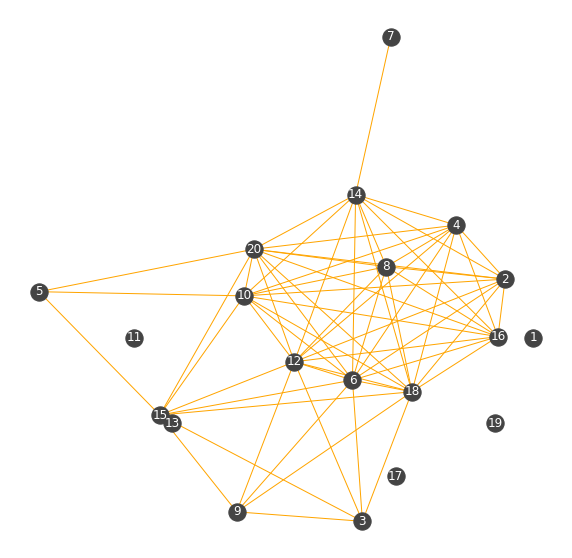

In [2]:
# fill this up with edges u,v iff u,v not coprime
mylist = [] 
for u in range(1,21): # possible u node
    for v in range(1,21): # possible v node
        if math.gcd(u,v)>1:
            mylist.append((u,v))

# Undirected Graph
G = nx.Graph()
G.add_nodes_from(range(1,21)) # V = 20 nodes
G.add_edges_from(mylist) # E = defined by mylist

fig,ax = plt.subplots(1,1,figsize=(10,10))
nx.draw(G, 
        pos=nx.kamada_kawai_layout(G), 
        ax=ax,
        with_labels=True, 
        node_color='#444444',
        font_color="white",
        edge_color = 'orange',
        width = 1)

### 2. Isomorphism

Draw all graphs with four nodes and four edges, up to isomorphism.

<hr>

**Def:** Two graphs $G_1 = (V_1,E_1)$ and $G_2 = (V_2,E_2)$ are **isomorphic** if there exists a bijection $f: V_1 \rightarrow V_2$ such that 

$$
xy \in G_1 \Leftrightarrow f(x)f(y) \in G_2
$$

When $G_1$ is isomorphic to $G_2$, we write $G_1 \equiv G_2$.

Isomorphism is an equivalence relation on graphs. In fact, we typically do not distinguish between isomorphic graphs.

<hr>

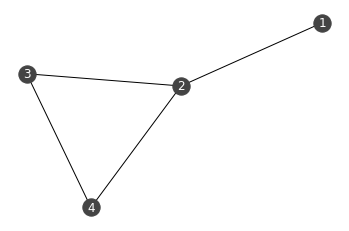

In [3]:
G = nx.Graph()
G.add_nodes_from(range(1,5)) # V: 4 nodes
G.add_edges_from([(1,2),(2,3),(3,4),(4,2)]) # 4 Edges
basic_graph,ax = plt.subplots(1,1)
nx.draw(G, 
        ax=ax, 
        pos=nx.kamada_kawai_layout(G),
        with_labels=True, 
        node_color='#444444',
        font_color="white")

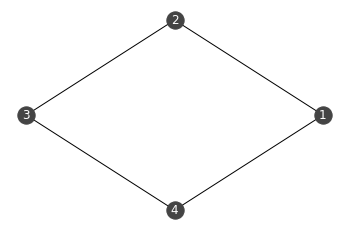

In [4]:
G = nx.Graph()
G.add_nodes_from(range(1,5)) # V: 4 nodes
G.add_edges_from([(1,2),(2,3),(3,4),(4,1)]) # 4 Edges
basic_graph,ax = plt.subplots(1,1)
nx.draw(G, 
        ax=ax, 
        pos=nx.kamada_kawai_layout(G),
        with_labels=True, 
        node_color='#444444',
        font_color="white")

### 3. Bipartite Graphs

a) What is the greatest number of edges a connected bipartite graph with $5$ nodes can have? Draw all five node graphs with this number of edges up to isomorphism.

b) What is the least number of edges a connected bipartite graph with $5$ nodes can have? Draw all five node graphs with this number of edges up to isomorphism.

<hr>

**Bipartite**

Let $G = (V,E)$ and $V = V_1 \cup V_2$ with $V_1 \cap V_2 = \emptyset$. If every edge joins a vertex from $V_1$ to a vertex in $V_2$, then $G$ is bipartite. 

<hr>

**Connected**

A graph is connected if every pair of vertices $x$, $y$, there is a path from $x$ to $y$. 

<hr>

https://math.stackexchange.com/questions/1098587/maximum-number-of-edges-in-a-bipartite-graph <br>
The greatest number of edges a connected bipartite graph with 5 nodes is 6.

Proof:
<br>
Let a bipartite graph be composed by $p$ and $q$ where $p+q=n$.
<br>
The maximum number of edges is $pq$. This is maximized when $p=q$ such that $q=n-p$.
<br><br>
$\begin{eqnarray}
f(p)  & = & pq \\
      & = & p(n-p) \\
max(f'(p)) & = & n - 2p & = & 0 \\
p      & = & \frac{n}{2}
\end{eqnarray}$
<br>

Thus the maximum is $\frac{n^2}{4}$.

In [5]:
G0 = nx.Graph(); 
G0.add_nodes_from(list(range(1,3)), bipartite=0); # The bipartite set U
G0.add_nodes_from(['a','b','c'], bipartite=1); # The bipartite set V
G0.add_edges_from([('a',1),('a',2),('b',1),('b',2),('c',1),('c',2)]) 

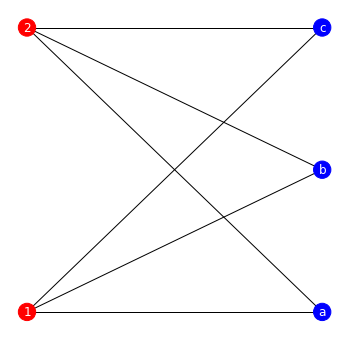

In [6]:
nc = ['r']*2 + ['b']*3

fig,ax = plt.subplots(figsize=(6,6))
plt.subplots_adjust(wspace=0.5);

nx.draw(G0, 
        ax=ax, 
        with_labels=True, 
        pos=nx.bipartite_layout(G0,[1,2]), 
        node_color=nc, 
        font_color="white")

The least number of edges a connected bipartite graph with 5 nodes is 4.

In [7]:
G0 = nx.Graph(); 
G0.add_nodes_from(list(range(1,2)), bipartite=0); # The bipartite set U
G0.add_nodes_from(['a','b','c','d'], bipartite=1); # The bipartite set V
G0.add_edges_from([(1,'a'),(1,'b'),(1,'c'),(1,'d')]) 

In [8]:
G1 = nx.Graph(); 
G1.add_nodes_from(list(range(1,3)), bipartite=0); # The bipartite set U
G1.add_nodes_from(['a','b','c'], bipartite=1); # The bipartite set V
G1.add_edges_from([('a',1),('a',2),('b',2),('c',2)])

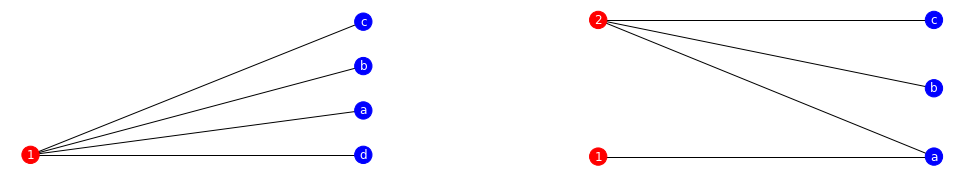

In [9]:
nc = ['r']*1 + ['b']*4

fig,axs = plt.subplots(1,2,figsize=(17,3))
plt.subplots_adjust(wspace=0.5);

nx.draw(G0, 
        ax=axs[0], 
        with_labels=True, 
        pos=nx.bipartite_layout(G0,[1]), 
        node_color=nc, 
        font_color="white")

nc = ['r']*2 + ['b']*3

nx.draw(G1, 
        ax=axs[1], 
        with_labels=True, 
        pos=nx.bipartite_layout(G1,[1,2]), 
        node_color=nc, 
        font_color="white")

In [10]:
Gs = [G0,G1]

# Double check if bipartite
for i,v in enumerate(Gs):
    print('Gs['+str(i)+'] bipartite: ' ,nx.is_bipartite(v))

Gs[0] bipartite:  True
Gs[1] bipartite:  True


In [11]:
# Check for isomorphisms in the list of Gs
def test4Iso(Gs):
    '''
    Assumes Gs is a list of graphs with the same # of nodes
    Prints out tuples of the indices of Gi,Gj and whether or not Gi is isomorphic to Gj
    '''
    nums = itertools.combinations(range(len(Gs)),2)
    comb = itertools.combinations(Gs,2)

    for i,v in zip(nums,comb): 
        print(i,nx.is_isomorphic(v[0],v[1]))

test4Iso(Gs)

(0, 1) False


### 4. Cycles

Define and draw a graph that decomposes into three non-overlapping cycles and whose maximal degree is $4$. 

<hr>

**Def**
The degree of a vertex $x$ is $|\Gamma(x)|$ and is denoted $d(x)$.

<hr>

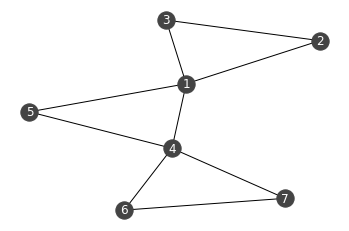

In [12]:
G = nx.Graph()
G.add_nodes_from(range(1,7)) # V: 8 nodes
G.add_edges_from([(1,2),(2,3),(3,1),
                  (1,4),(1,5),(4,5),
                  (4,6),(4,7),(6,7)])
fig,ax = plt.subplots(1,1)
nx.draw(G, 
        ax=ax, 
        pos=nx.kamada_kawai_layout(G),
        with_labels=True, 
        node_color='#444444',
        font_color="white")

### 5. Hamiltonian Circuits

Consider the set of square grid graphs like those returned by the function `nx.grid_graph(dim=[n,n])` where $n>0$. Show that these graphs always have a Hamilton Circuit when $n$ is even. Use networkx to draw the square grid graph for $n=6$, highlighting a Hamilton cycle. 

In [13]:
def route_graph(route):
    """Turns a list into a graph"""
    R = nx.Graph()
    R.add_nodes_from(route)
    for i in range(len(route)-1):
        R.add_edge(route[i], route[i+1])
    return R

In [14]:
# Draw the graph with the circuit highlighted
def route_plot(G,route):
    
    RG = route_graph(route)
    
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    edge_colors = ["orange" if RG.has_edge(u,v) else "gray" for u,v in G.edges]
    edge_widths = [5 if RG.has_edge(u,v) else 0.5 for u,v in G.edges]

    nx.draw(G, 
            pos=nx.kamada_kawai_layout(G), 
            ax=ax,
            with_labels=True, 
            node_color='#444444',
            font_color="white",
            edge_color = edge_colors,
            width = edge_widths)

/home/kegedy/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


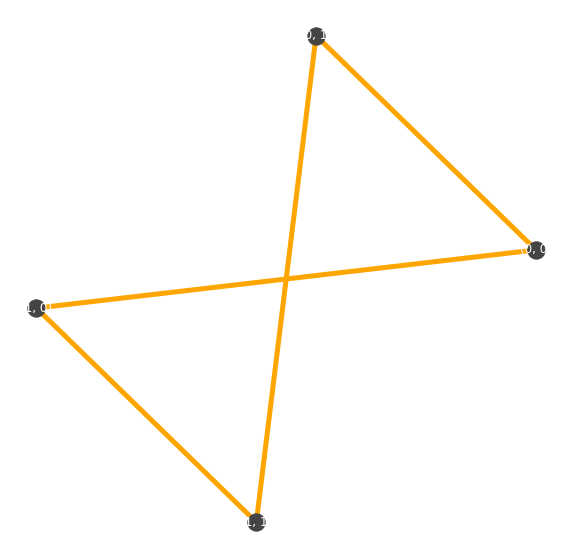

In [15]:
n = 2
G = nx.grid_graph(dim=[n,n])
n2route = [(0,0),(0,1),
           (1,1),(1,0),(0,0)]
route_plot(G,n2route)

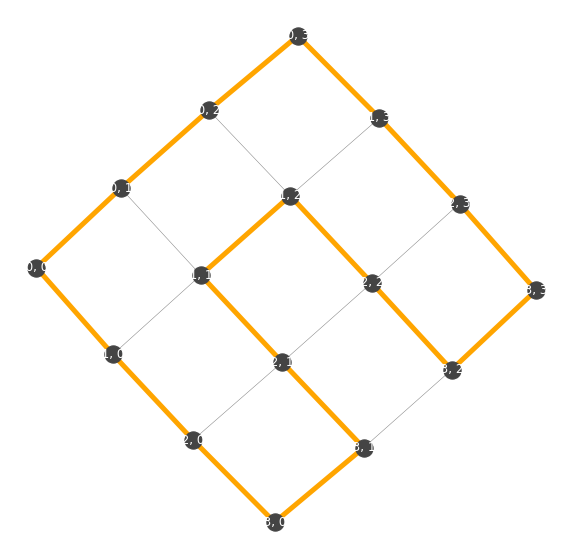

In [16]:
n = 4
G = nx.grid_graph(dim=[n,n])
n4route = [(0,0),(0,1),(0,2),(0,3),
           (1,3),(2,3),(3,3),(3,2),
           (2,2),(1,2),(1,1),(2,1),
           (3,1),(3,0),(2,0),(1,0),(0,0)]
route_plot(G,n4route)

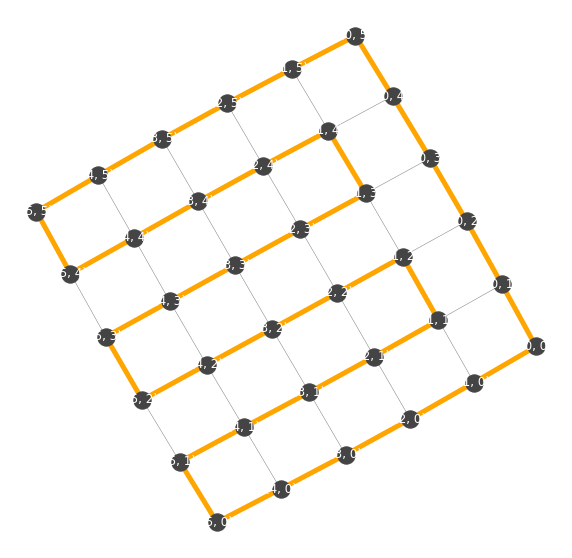

In [17]:
n = 6
G = nx.grid_graph(dim=[n,n])
n6route = [(0,0),(0,1),(0,2),(0,3),(0,4),(0,5),
           (1,5),(2,5),(3,5),(4,5),(5,5),(5,4),
           (4,4),(3,4),(2,4),(1,4),(1,3),(2,3),
           (3,3),(4,3),(5,3),(5,2),(4,2),(3,2),
           (2,2),(1,2),(1,1),(2,1),(3,1),(4,1),
           (5,1),(5,0),(4,0),(3,0),(2,0),(1,0),(0,0)]
route_plot(G,n6route)

By the laws of generality, we can observe there is always a Hamilton Circuit for even numbers.

### 6. Spanning Trees and Hamilton Paths

In the spanning tree algorithm presented in class (and in the Jupyter notebook for this week), the spanning tree algorithm always starts with node zero. Furthermore, it always chooses the first neighbor of $v$ (in the `v.pop()` line). Thus, when the approximate Hamilton Cycle algorithm finds a spanning tree, it always gets the same one. 

Modify the spanning tree function to choose a random starting point and a random neighbor. Then write a wrapper around the code for the approximate Hamilton Cycle algorithm that runs it 10 times and returns the shortest cycle found.

In [18]:
def spanning_tree(G):
    """Returns a spanning tree of the graph G if one exists, otherwise
       raises an exception."""
    
    # Initialize
    V = {random.choice(tuple(G.nodes))}
    E = set({})
    
    while len(V) < len(G.nodes):

        # find a node u in V that has a neighbor v in notV
        v = None
        for u in V:
            nbrs = set(G.neighbors(u)) - V
            if len(nbrs) > 0:
                v = random.choice(tuple(nbrs))
                #nbrs.remove(v)
                break
        
        # If no v is found, then return an exception
        if v == None:
            raise Exception("Graph is not connected")
        
        # Add that node to V
        V.add(v)
        
        # Add the edge uv to E
        E.add((u,v))
        
    # Build the graph
    T = nx.Graph()
    T.add_nodes_from(V)
    T.add_edges_from(E)
    
    return T

In [19]:
# Suroutines for for finding approximate HAMILTON CYCLE

# Global variable for storing the nodes visited during depth first search
def approx_Hcycle(G,T):
    route = []

    def DFS(T):
        """Given a tree T, do a depth first search starting
           with the first node. Returns a list of nodes visited,
           including repeats of nodes revisited when backtracking."""
        global route
        route = []
        for v in T.nodes:
            T.nodes[v]["visited"] = False;
        v = list(T.nodes)[0]
        DFS_aux(T,v)
        return route

    def DFS_aux(T,v):
        """Auxilliary method for depth first search"""
        global route
        route.append(v)
        T.nodes[v]["visited"] = True
        children = [u for u in T.neighbors(v) if not T.nodes[u]["visited"]]
        for child in children:
            DFS_aux(T,child)
            route.append(v)

    def shorten(G,route):
        """Given a graph G and a route, shorten the route as much
           as possible."""
        new_route = shorten_by_one(G,route)
        while len(new_route) < len(route):
            route = new_route
            new_route = shorten_by_one(G,route)
        return new_route

    def shorten_by_one(G,route):
        """Given a graph G and a sequence of nodes in route, try to find a 
           repeated node that can be skipped. Return the new route if such a 
           node can be found, or the given route if not."""
        repeats = [v for v in route[1:-1] if route.count(v) > 1]
        random.shuffle(repeats) # avoids always picking 0
        for r in repeats:
            for i,v in enumerate(route):
                if route[i] == r and i != 0 and i != len(route) - 1:
                    x,y = route[i-1], route[i+1]
                    if G.has_edge(x,y):
                        return route[0:i] + route[i+1:]
        return route

    def route_graph(route):
        """Turns a list into a graph"""
        R = nx.Graph()
        R.add_nodes_from(route)
        for i in range(len(route)-1):
            R.add_edge(route[i], route[i+1])
        return R
    
    return shorten(G,DFS(T))


In [20]:
def myWrapper(G):
    '''
    Assumes G is a graph.
    Returns the shortest approximate Hamilton Cycle found
    '''
    
    myR = None
    shortest = 80
    
    for i in range(10):
        # Find a spanning tree
        T = spanning_tree(G)
        
        # Do depth first search and shortening
        route = approx_Hcycle(G,T)
        
        if len(route)-1 < shortest:
            myR = route 
            shortest = len(route) - 1
            print(f'new shortest is {shortest}')
    
    return myR

In [21]:
n = 10
myR = None
G = None
while (1):
    try:
        G = nx.fast_gnp_random_graph(n,0.5)
        myR = myWrapper(G)
    except Exception as e:
        continue
    if myR != None: break

new shortest is 12
new shortest is 10


Route has length 10
Optimal!!!


[0, 2, 1, 3, 6, 7, 9, 4, 5, 8, 0]

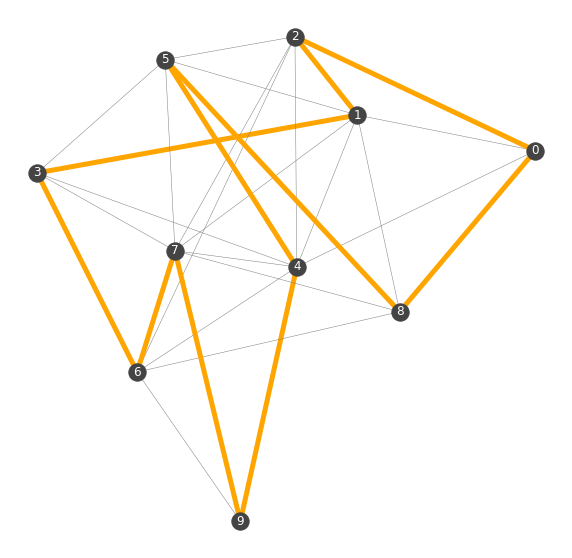

In [22]:
# Draw the graph with the circuit highlighted
RG = route_graph(myR)

fig,ax = plt.subplots(1,1,figsize=(10,10))
edge_colors = ["orange" if RG.has_edge(u,v) else "gray" for u,v in G.edges]
edge_widths = [5 if RG.has_edge(u,v) else 0.5 for u,v in G.edges]

nx.draw(G, 
        pos=nx.kamada_kawai_layout(G), 
        ax=ax,
        with_labels=True, 
        node_color='#444444',
        font_color="white",
        edge_color = edge_colors,
        width = edge_widths)

print("Route has length %d" % (len(myR)-1))
if (len(myR)-1) == n:
    print("Optimal!!!")
myR

### 7. The Laplacian

Consider the random graphs returned by `nx.fast_gnp_random_graph(n,p)` where $n$ is the number of nodes and $p$ is the probability of an edge between any two nodes. 

Make a list of graphs with $10$ nodes with $p$ ranging from 0 to 1 by steps of 0.01. For each graph, compute the eigenvalues of the Laplacian. Then plot all the eigenvalues for against $p$. For example, above $p=0.01$ you would have a point for each of the 10 real eigenvalues of the graph you made with $p=0.01$. 

What trends do you see in the eigenvalues?

Based on experimentation, what are the eigenvalues of the Laplacian of a completely connected graph?

/home/kegedy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/kegedy/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/home/kegedy/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/home/kegedy/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/home/kegedy/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=

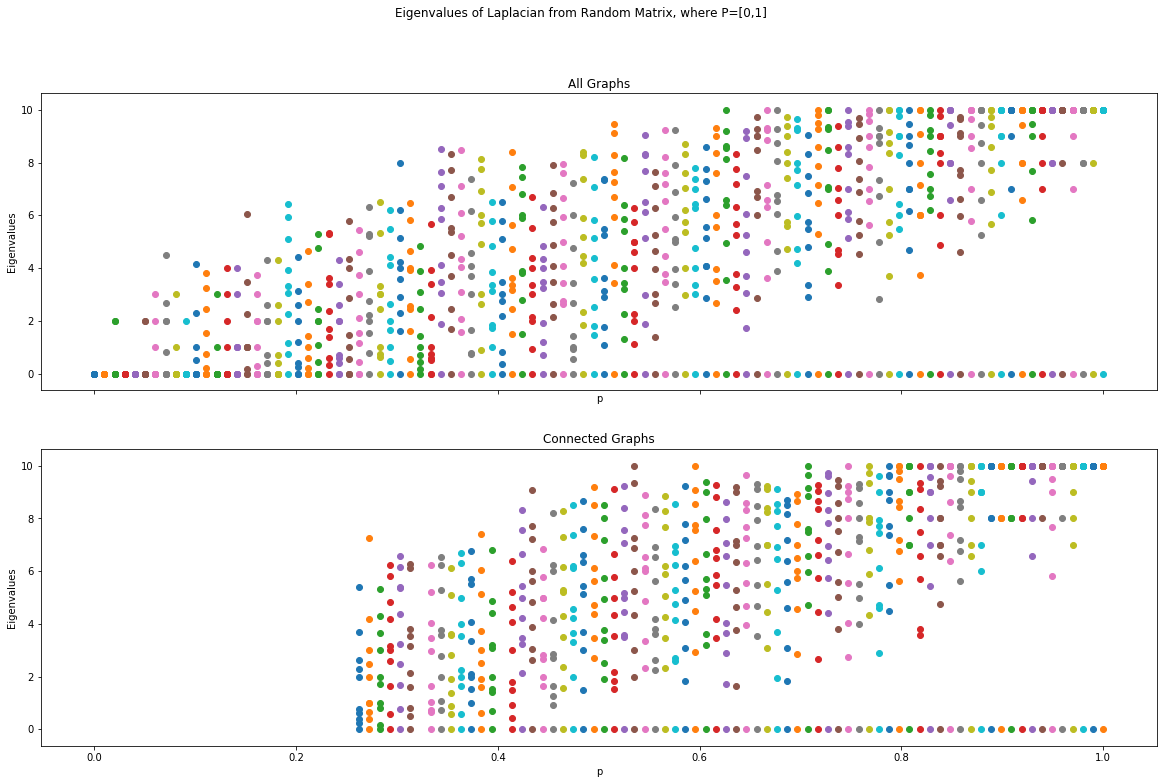

In [23]:
# nx.fast_gnp_random_graph(n,p)
    ### Returns a G_{n,p} random graph, 
    ### also known as an Erdős-Rényi graph or a binomial graph.
        # n (int) – The number of nodes
        # p (float) – Probability for edge creation

# nx.laplacian_matrix(G)
    ### The graph Laplacian is the matrix L = D - A, 
    ### where A is the adjacency matrix and D is the diagonal matrix of node degrees.
        # G (graph) – A NetworkX graph

fig,axs = plt.subplots(2,1,figsize=(20,12),sharex=True)
        
nodes = 10
step = 0.01
steps = (1-0)/step
P = np.linspace(0,1,steps,endpoint=True)

# All Graphs
for p in P:
    G = nx.fast_gnp_random_graph(nodes,p)
    L = nx.laplacian_matrix(G).todense()
    eigs = np.linalg.eigvals(L)
    x = p * np.ones(len(eigs))
    axs[0].scatter(x,eigs)
    axs[0].set_xlabel('p')
    axs[0].set_ylabel('Eigenvalues')
    axs[0].set_title('All Graphs')

# Only Complete Graphs
minConP = None
for p in P:
    G = nx.fast_gnp_random_graph(nodes,p)
    if nx.number_connected_components(G)>1: continue
    L = nx.laplacian_matrix(G).todense()
    eigs = np.linalg.eigvals(L)
    x = p * np.ones(len(eigs))
    axs[1].scatter(x,eigs)
    axs[1].set_xlabel('p')
    axs[1].set_ylabel('Eigenvalues')
    axs[1].set_title('Connected Graphs')

plt.suptitle("Eigenvalues of Laplacian from Random Matrix, where P=[0,1]")
plt.show();
#size of the multiplicity of the eigenvalues

We can observe that at every $p$ value there is an eigenvalue at $0$. In general, the eigenvalues trend towards the max number of nodes as $p$ approaches $1$. For $p$ values greater than $0.8$, there exists eigenvalues with value of max number of nodes $10$. For $p$ values less than $0.45$ there does not always exist a connected graph.